**Sekolah = SMK Negeri 1 Surabaya**

**Nama Peserta = M. Shofian Najib & Davino Edric F.**

**No. Peserta =**

# 1. Import dan EDA

In [180]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [181]:
df = pd.read_csv('fruit_data_with_colors.txt', sep="\t")
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


In [183]:
df.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


In [184]:
df.duplicated().sum()

np.int64(0)

## 1.1 Visualisasi distribusi buah

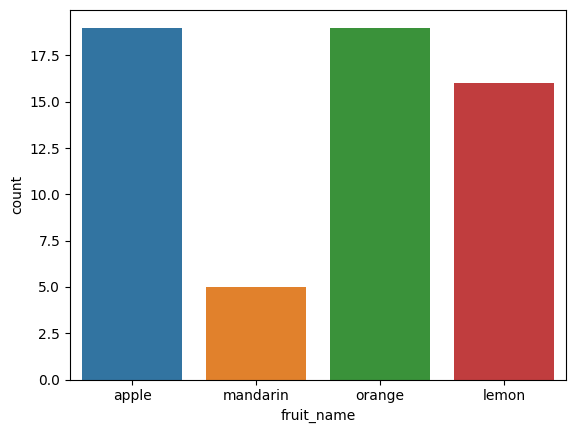

In [185]:
sns.countplot(x=df['fruit_name'], hue=df['fruit_name'])
plt.show()

## 1.2 Visualisasi Scatterplot antar kolom

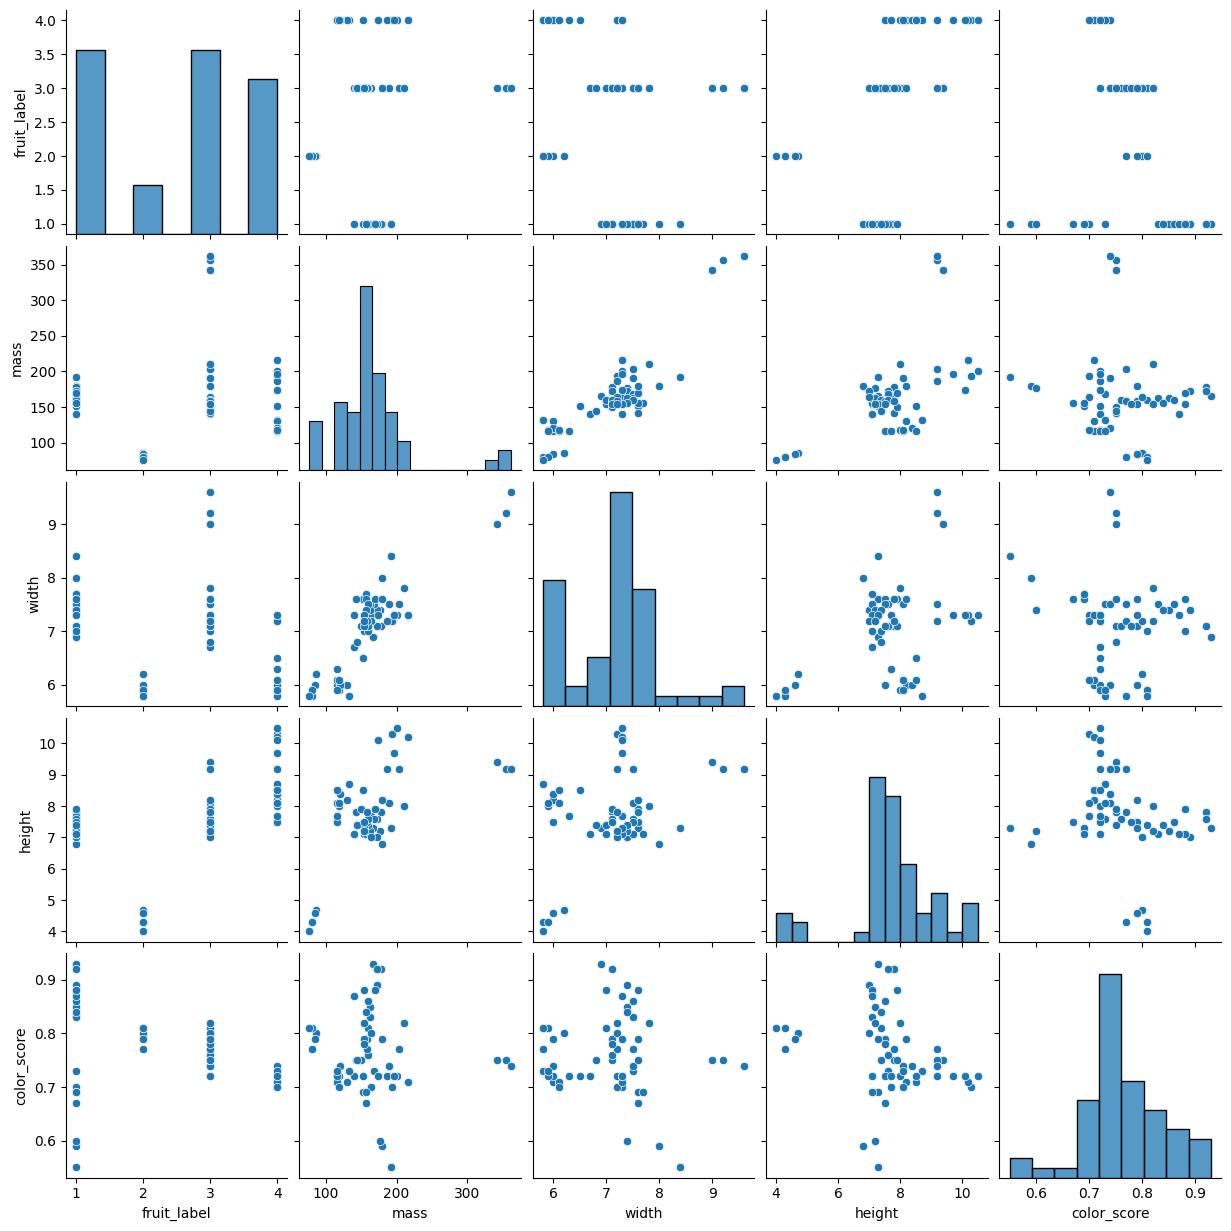

In [186]:
sns.pairplot(df)
plt.show()

Insight: Non linear pattern, clustered pattern

## 1.3 Pengecekan distribusi color score untuk tiap buah

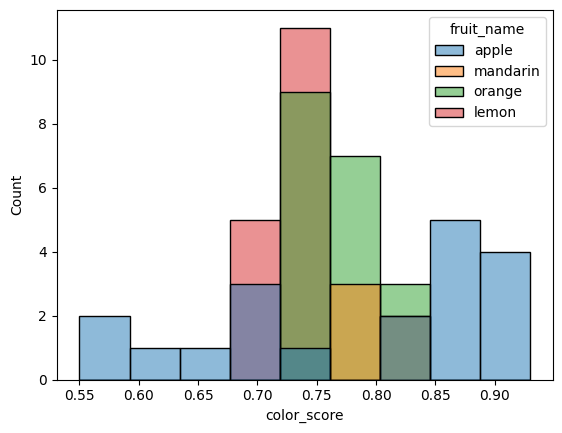

In [187]:
sns.histplot(x=df['color_score'], hue=df['fruit_name'])
plt.show()

## 1.4 Pengecekan korelasi menggunakan heatmap dengan metode spearman (non-linear)

In [188]:
dfn = df.drop(columns=['fruit_name','fruit_subtype'])

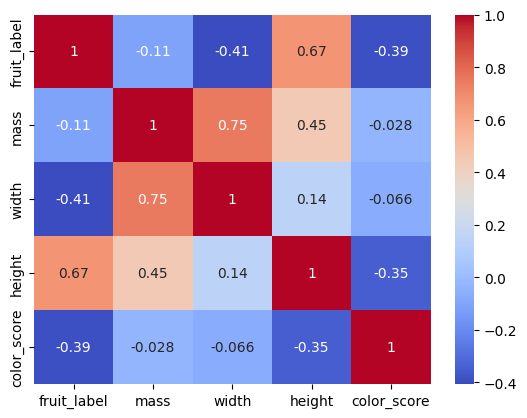

In [189]:
sns.heatmap(dfn.corr('spearman'), annot=True,cmap='coolwarm')
plt.show()

## 1.5 Pengecekan hubungan antara Sub tipe buah dengan tiap buah

### **Pengecekan nilai unik sub tipe dan jumlahnya**

In [190]:
df['fruit_subtype'].value_counts()

fruit_subtype
turkey_navel        10
unknown             10
spanish_belsan       6
selected_seconds     6
cripps_pink          6
mandarin             5
golden_delicious     5
braeburn             5
granny_smith         3
spanish_jumbo        3
Name: count, dtype: int64

Insight: Sub Tipe buah merupakan brand produsen buah tersebut

### **Pengecekan hubungan antara Sub tipe buah dengan tiap buah**

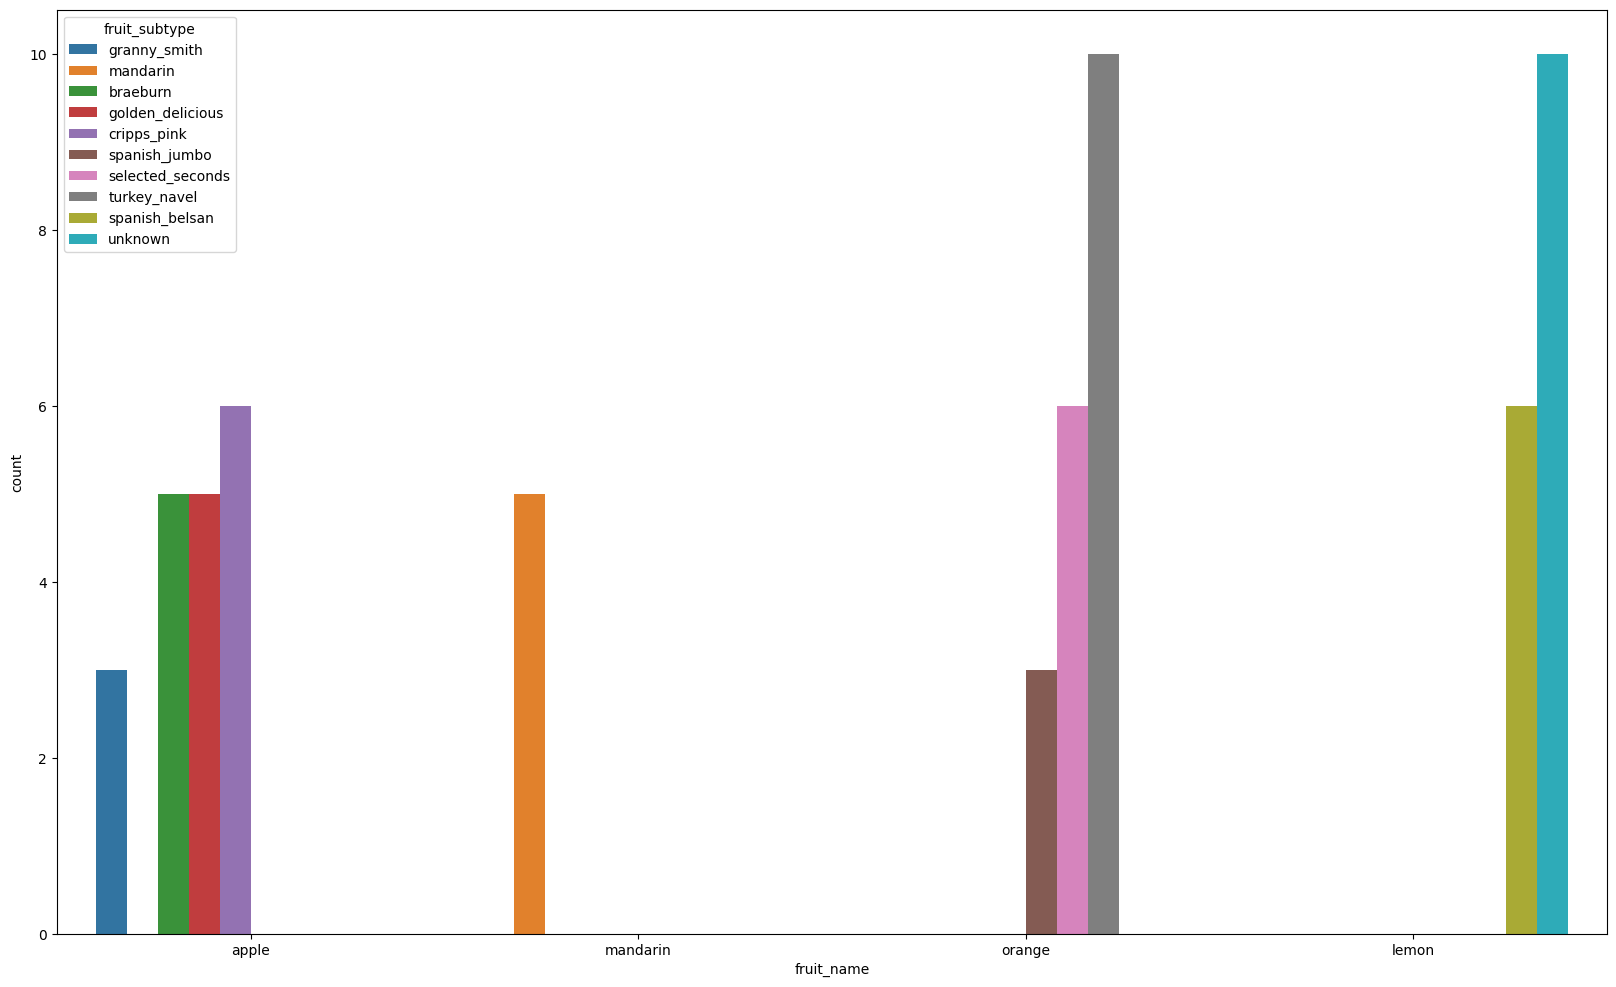

In [191]:
plt.figure(figsize=(20,12))
sns.countplot(x=df['fruit_name'],hue=df['fruit_subtype'])
plt.show()

### **Melakukan groupby untuk mengecek produsen terumum serta kesimpulan statistik tiap buah**

In [192]:
groupby_data = df.groupby('fruit_name')['fruit_subtype'].describe()
groupby_data

,count,unique,top,freq
fruit_name,,,,
apple,19,4,cripps_pink,6
lemon,16,2,unknown,10
mandarin,5,1,mandarin,5
orange,19,3,turkey_navel,10


# 2. Preprocessing Data

Duplikasi dataframe untuk backup data

In [193]:
df_backup = df.copy(deep=True)

## 2.1 Label Encoding Fruit_Name

In [194]:
fruit_map = {
    'apple' : 1,
    'mandarin': 2,
    'orange': 3,
    'lemon': 4
}

df['fruit_name'] = df['fruit_name'].map(fruit_map)
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,1,granny_smith,192,8.4,7.3,0.55
1,1,1,granny_smith,180,8.0,6.8,0.59
2,1,1,granny_smith,176,7.4,7.2,0.60
3,2,2,mandarin,86,6.2,4.7,0.80
4,2,2,mandarin,84,6.0,4.6,0.79


### Pengecekan Anomali setelah encoding

In [195]:
df[['fruit_label','fruit_name']].duplicated().sum()

np.int64(55)

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     int64  
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(3), object(1)
memory usage: 3.4+ KB


In [197]:
adf = df[['fruit_label','fruit_name']].drop_duplicates()
adf

,fruit_label,fruit_name
0,1,1
3,2,2
24,3,3
43,4,4


In [198]:
df['fruit_subtype'].value_counts()

fruit_subtype
turkey_navel        10
unknown             10
spanish_belsan       6
selected_seconds     6
cripps_pink          6
mandarin             5
golden_delicious     5
braeburn             5
granny_smith         3
spanish_jumbo        3
Name: count, dtype: int64

### Insight: Tidak ada anomali data

## 2.2 One hot encoding kolom fruit_subtype

In [199]:
df = pd.get_dummies(data=df,columns=['fruit_subtype'])

In [200]:
df.head()

,fruit_label,fruit_name,mass,width,height,color_score,fruit_subtype_braeburn,fruit_subtype_cripps_pink,fruit_subtype_golden_delicious,fruit_subtype_granny_smith,fruit_subtype_mandarin,fruit_subtype_selected_seconds,fruit_subtype_spanish_belsan,fruit_subtype_spanish_jumbo,fruit_subtype_turkey_navel,fruit_subtype_unknown
0,1,1,192,8.4,7.3,0.55,False,False,False,True,False,False,False,False,False,False
1,1,1,180,8.0,6.8,0.59,False,False,False,True,False,False,False,False,False,False
2,1,1,176,7.4,7.2,0.60,False,False,False,True,False,False,False,False,False,False
3,2,2,86,6.2,4.7,0.80,False,False,False,False,True,False,False,False,False,False
4,2,2,84,6.0,4.6,0.79,False,False,False,False,True,False,False,False,False,False


In [201]:
df.rename(columns={'fruit_subtype_unknown': 'fruit_subtype_others'},inplace=True)

In [202]:
df['density'] = df['mass'] / (df['width'] * df['height'])
df.head()

,fruit_label,fruit_name,mass,width,height,color_score,fruit_subtype_braeburn,fruit_subtype_cripps_pink,fruit_subtype_golden_delicious,fruit_subtype_granny_smith,fruit_subtype_mandarin,fruit_subtype_selected_seconds,fruit_subtype_spanish_belsan,fruit_subtype_spanish_jumbo,fruit_subtype_turkey_navel,fruit_subtype_others,density
0,1,1,192,8.4,7.3,0.55,False,False,False,True,False,False,False,False,False,False,3.131115
1,1,1,180,8.0,6.8,0.59,False,False,False,True,False,False,False,False,False,False,3.308824
2,1,1,176,7.4,7.2,0.60,False,False,False,True,False,False,False,False,False,False,3.303303
3,2,2,86,6.2,4.7,0.80,False,False,False,False,True,False,False,False,False,False,2.951270
4,2,2,84,6.0,4.6,0.79,False,False,False,False,True,False,False,False,False,False,3.043478


In [203]:
df[df['fruit_subtype_others'] == True]

,fruit_label,fruit_name,mass,width,height,color_score,fruit_subtype_braeburn,fruit_subtype_cripps_pink,fruit_subtype_golden_delicious,fruit_subtype_granny_smith,fruit_subtype_mandarin,fruit_subtype_selected_seconds,fruit_subtype_spanish_belsan,fruit_subtype_spanish_jumbo,fruit_subtype_turkey_navel,fruit_subtype_others,density
49,4,4,132,5.8,8.7,0.73,False,False,False,False,False,False,False,False,False,True,2.615933
50,4,4,130,6.0,8.2,0.71,False,False,False,False,False,False,False,False,False,True,2.642276
51,4,4,116,6.0,7.5,0.72,False,False,False,False,False,False,False,False,False,True,2.577778
52,4,4,118,5.9,8.0,0.72,False,False,False,False,False,False,False,False,False,True,2.500000
53,4,4,120,6.0,8.4,0.74,False,False,False,False,False,False,False,False,False,True,2.380952
54,4,4,116,6.1,8.5,0.71,False,False,False,False,False,False,False,False,False,True,2.237223
55,4,4,116,6.3,7.7,0.72,False,False,False,False,False,False,False,False,False,True,2.391260
56,4,4,116,5.9,8.1,0.73,False,False,False,False,False,False,False,False,False,True,2.427286
57,4,4,152,6.5,8.5,0.72,False,False,False,False,False,False,False,False,False,True,2.751131
58,4,4,118,6.1,8.1,0.70,False,False,False,False,False,False,False,False,False,True,2.388181


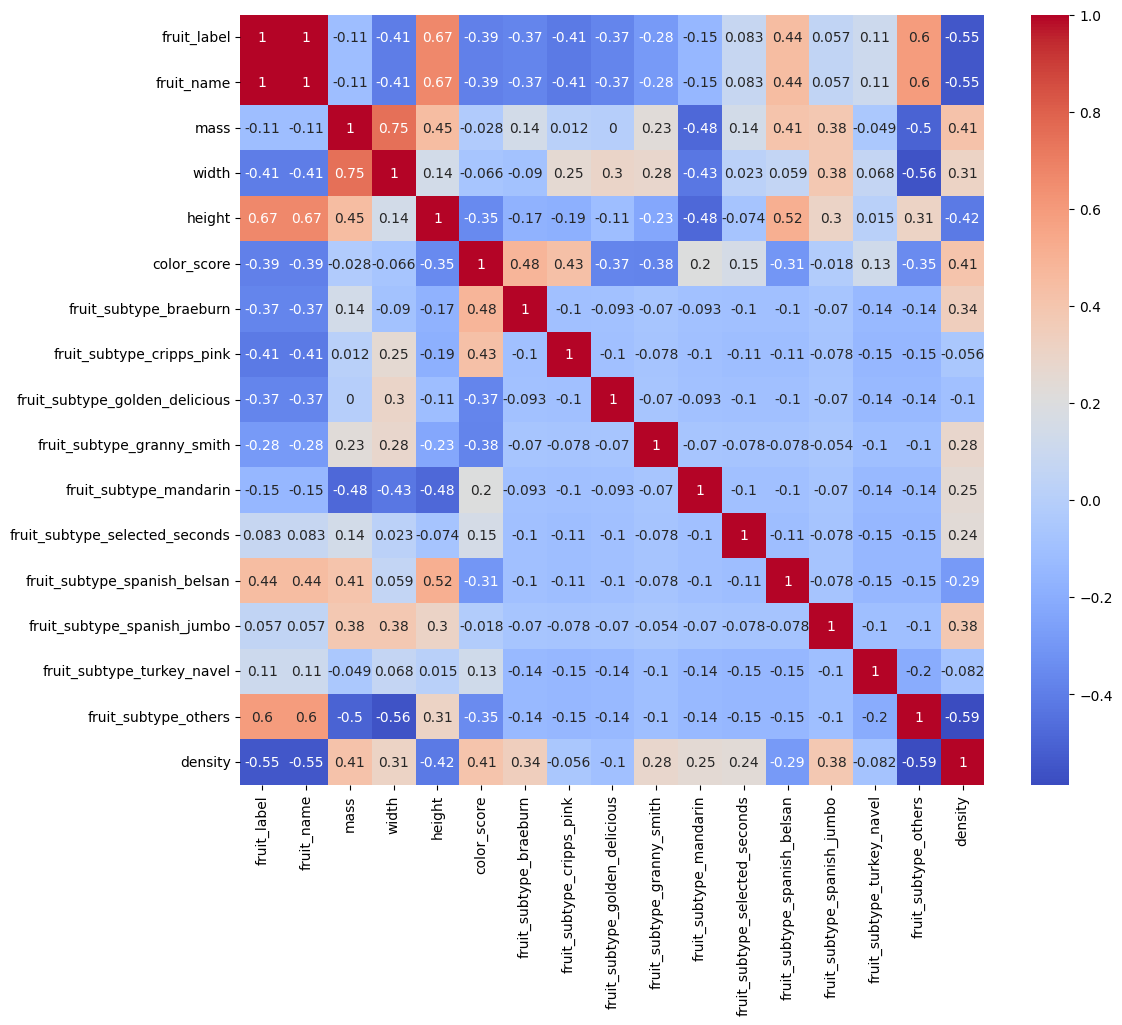

In [204]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr('spearman'),annot=True,cmap='coolwarm')
plt.show()

### Insight: Mungkin menghapus kolom fruit_name atau menduplikat dataframe untuk modeling, dan memisahkannya dengan dataframe asli (dengan nama buah yang di convert kembali)

## Melakukan split data untuk normalisasi

In [205]:
x = df.drop(columns=['fruit_label','fruit_name'])
y = df['fruit_label']

In [206]:
y.value_counts()

fruit_label
1    19
3    19
4    16
2     5
Name: count, dtype: int64

In [207]:
def train_test_split(x, y, test_size=0.2, stratify=None, random_state=None):
    np.random.seed(random_state)
    
    x = np.array(x)
    y = np.array(y)
    
    if stratify is not None:
        unique_classes, y_indices = np.unique(stratify, return_inverse=True)
        test_indices = np.array([], dtype=int)
        train_indices = np.array([], dtype=int)
        
        for class_index in range(len(unique_classes)):
            class_indices = np.where(y_indices == class_index)[0]
            np.random.shuffle(class_indices)
            
            n_test = int(len(class_indices) * test_size)
            test_indices = np.concatenate((test_indices, class_indices[:n_test]))
            train_indices = np.concatenate((train_indices, class_indices[n_test:]))
    else:
        indices = np.arange(len(y))
        np.random.shuffle(indices)
        
        n_test = int(len(y) * test_size)
        test_indices = indices[:n_test]
        train_indices = indices[n_test:]
    
    x_train, x_test = x[train_indices], x[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)
print(f'Jumlah x_train : {x_train.shape}')
print(f'Jumlah x_test : {x_test.shape}')
print(f'Jumlah y_train : {y_train.shape}')
print(f'Jumlah y_test : {y_test.shape}')

Jumlah x_train : (49, 15)
Jumlah x_test : (10, 15)
Jumlah y_train : (49,)
Jumlah y_test : (10,)


## 2.4 Normalisasi fitur numerik (mass, width, height, color_score, density)

In [209]:
def min_max_scaler(train, test):
    min_val = np.min(train, axis=0)
    max_val = np.max(train, axis=0)
    epsilon = 1e-10
    train_scaled = (train - min_val) / (max_val - min_val + epsilon)
    test_scaled = (test - min_val) / (max_val - min_val + epsilon)
    
    return train_scaled, test_scaled, min_val, max_val

x_train_scaled, x_test_scaled, minim, maxim = min_max_scaler(x_train, x_test)

In [210]:
x_train[0]

array([180, 8.0, 6.8, 0.59, False, False, False, True, False, False,
       False, False, False, False, 3.308823529411765], dtype=object)

In [211]:
x_train_scaled[0]

array([0.35460992907788846, 0.5789473684058173, 0.40322580644510925, 0.0,
       0.0, 0.0, 0.0, 0.9999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.5756623786434499], dtype=object)

### Melakukan Oversampling Sintetis (SMOTE)

In [212]:
def smote(x, y, random_state=42, k=5):
    np.random.seed(random_state)
    
    unique_classes = np.unique(y)
    class_counts = {class_label: np.sum(y == class_label) for class_label in unique_classes}
    max_class_count = max(class_counts.values())
    
    x_resampled = x.tolist()
    y_resampled = y.tolist()
    
    for class_label in unique_classes:
        if class_counts[class_label] < max_class_count:
            class_indices = np.where(y == class_label)[0]
            class_samples = x[class_indices]
            
            n_samples_to_generate = max_class_count - class_counts[class_label]
            
            for _ in range(n_samples_to_generate):
                sample_index = np.random.choice(class_indices)
                sample = x[sample_index]
                
                sample = np.array(sample).astype(float)
                class_samples = np.array(class_samples).astype(float)
                
                distances = np.linalg.norm(class_samples - sample, axis=1)
                nearest_neighbors = np.argsort(distances)[1:k+1]
                
                neighbor_index = np.random.choice(nearest_neighbors)
                neighbor = class_samples[neighbor_index]
                
                diff = neighbor - sample
                synthetic_sample = sample + np.random.rand() * diff
                
                x_resampled.append(synthetic_sample)
                y_resampled.append(class_label)
    
    return np.array(x_resampled), np.array(y_resampled)

x_train_resampled, y_train_resampled = smote(x_train_scaled, y_train)

In [213]:
y_train_resampled_series = pd.Series(y_train_resampled)

#### Mengecek distribusi kelas yang sudah di SMOTE

In [214]:
y_train_resampled_series.value_counts()

1    16
2    16
3    16
4    16
Name: count, dtype: int64

# 3. Modelling

## 3.1 Model KNN Manual

In [215]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def manhattan_distance(a, b):
    return np.sum(np.abs(a - b))

def minkowski_distance(a, b, p):
    return np.sum(np.abs(a - b) ** p) ** (1 / p)

class KNeighborsClassifierManual:
    def __init__(self, n_neighbors=5, metric='euclidean', p=3):
        self.n_neighbors = n_neighbors
        self.metric = metric
        self.p = p

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)
    
    def _predict(self, x):
        distances = [self._distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.n_neighbors]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common
    
    def _distance(self, a, b):
        if self.metric == 'euclidean':
            return euclidean_distance(a, b)
        elif self.metric == 'manhattan':
            return manhattan_distance(a, b)
        elif self.metric == 'minkowski':
            return minkowski_distance(a, b, self.p)
        else:
            raise ValueError(f"Unknown metric: {self.metric}")

## 3.2 Function Evaluasi Untuk KNN 

### Cross Validation
##### Digunakan dalam grid search manual

In [216]:
def cross_val_score_knn(knn, X, y, cv=5):
    np.random.seed(42)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    fold_sizes = np.full(cv, X.shape[0] // cv, dtype=int)
    fold_sizes[:X.shape[0] % cv] += 1
    current = 0
    scores = []

    for fold_size in fold_sizes:
        start, stop = current, current + fold_size
        test_indices = indices[start:stop]
        train_indices = np.concatenate([indices[:start], indices[stop:]])
        current = stop

        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]

        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = np.sum(y_pred == y_test) / len(y_test)
        scores.append(accuracy)

    return np.array(scores)

### Classification Report (Precision, Recall, F1)

In [217]:
def precision_recall_f1_support(y_true, y_pred, average=None):
    labels = np.unique(np.concatenate((y_true, y_pred)))
    report = {}
    
    for label in labels:
        tp = sum((y_true[i] == label) and (y_pred[i] == label) for i in range(len(y_true)))
        fp = sum((y_true[i] != label) and (y_pred[i] == label) for i in range(len(y_true)))
        fn = sum((y_true[i] == label) and (y_pred[i] != label) for i in range(len(y_true)))
        tn = sum((y_true[i] != label) and (y_pred[i] != label) for i in range(len(y_true)))

        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        support = sum(y == label for y in y_true)

        report[label] = {
            'precision': precision,
            'recall': recall,
            'f1-score': f1_score,
            'support': support
        }

    if average == 'macro':
        avg_precision = sum(report[label]['precision'] for label in labels) / len(labels)
        avg_recall = sum(report[label]['recall'] for label in labels) / len(labels)
        avg_f1_score = sum(report[label]['f1-score'] for label in labels) / len(labels)
        avg_support = sum(report[label]['support'] for label in labels)
        
        report['macro avg'] = {
            'precision': avg_precision,
            'recall': avg_recall,
            'f1-score': avg_f1_score,
            'support': avg_support
        }
    
    return report

def print_classification_report(report):
    print(f"{'Label':<10} {'Precision':<10} {'Recall':<10} {'F1-Score':<10} {'Support':<10}")
    print("="*50)
    for label, metrics in report.items():
        print(f"{label:<10} {metrics['precision']:<10.2f} {metrics['recall']:<10.2f} {metrics['f1-score']:<10.2f} {metrics['support']:<10}")

### Confusion Matrix manual (False Positive, False Negative)

In [218]:
def confusion_matrix_manual(y_true, y_pred):
    labels = np.unique(np.concatenate((y_true, y_pred)))
    matrix = np.zeros((len(labels), len(labels)), dtype=int)
    
    label_to_index = {label: index for index, label in enumerate(labels)}
    
    for true, pred in zip(y_true, y_pred):
        matrix[label_to_index[true], label_to_index[pred]] += 1
    
    return matrix, labels

def print_confusion_matrix(matrix, labels):
    print(f"{'':<10}", end="")
    for label in labels:
        print(f"{label:<10}", end="")
    print()
    
    for i, label in enumerate(labels):
        print(f"{label:<10}", end="")
        for j in range(len(labels)):
            print(f"{matrix[i, j]:<10}", end="")
        print()

### Grid Search manual

In [219]:
def grid_search_knn(X_train, y_train, param_grid, cv=5):
    best_score = 0
    best_params = None
    for n_neighbors in param_grid['n_neighbors']:
        for metric in param_grid['metric']:
            for p in param_grid.get('p', [3]):
                knn = KNeighborsClassifierManual(n_neighbors=n_neighbors, metric=metric, p=p)
                scores = cross_val_score_knn(knn, X_train, y_train, cv=cv)
                mean_score = scores.mean()
                if mean_score > best_score:
                    best_score = mean_score
                    best_params = {'n_neighbors': n_neighbors, 'metric': metric, 'p': p}
    return best_params, best_score

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2, 3, 4, 5] 
}

### Mencari parameter terbaik

In [220]:
best_params, best_score = grid_search_knn(x_train_resampled, y_train_resampled, param_grid, cv=5)
print(f'Best parameters: {best_params}')
print(f'Best cross-validation score: {best_score}')

Best parameters: {'n_neighbors': 3, 'metric': 'minkowski', 'p': 3}
Best cross-validation score: 1.0


## 3.3 Implementasi Model pada data

In [221]:
knn = KNeighborsClassifierManual(**best_params) # n_neighbors=5,metric='minkowski',p=3
knn.fit(x_train_resampled, y_train_resampled)
pred = knn.predict(x_test_scaled)

# 4. Evaluasi Model

## Akurasi dan Classification report

In [222]:
accuracy = np.mean(pred == y_test)
print(f'Akurasi Model KNN {accuracy}')

Akurasi Model KNN 1.0


In [223]:
report_knn = precision_recall_f1_support(y_test, pred, average='macro')
print_classification_report(report_knn)

Label      Precision  Recall     F1-Score   Support   
1          1.00       1.00       1.00       3         
2          1.00       1.00       1.00       1         
3          1.00       1.00       1.00       3         
4          1.00       1.00       1.00       3         
macro avg  1.00       1.00       1.00       10        


## Confusion Matrix

In [224]:
matrix, labels = confusion_matrix_manual(y_test, pred)
print_confusion_matrix(matrix, labels)

          1         2         3         4         
1         3         0         0         0         
2         0         1         0         0         
3         0         0         3         0         
4         0         0         0         3         


## Cross Validation

In [225]:
cv_scores = cross_val_score_knn(knn=knn,X=x_train_resampled,y=y_train_resampled,cv=5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean accuracy: {cv_scores.mean()}')

Cross-validation scores: [1. 1. 1. 1. 1.]
Mean accuracy: 1.0


In [226]:
for i in [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]:
    cv_scores = cross_val_score_knn(knn=knn,X=x_train_resampled,y=y_train_resampled,cv=i)
    print(f'Mean accuracy iterasi {i-1}: {cv_scores.mean()}')

Mean accuracy iterasi 1: 0.953125
Mean accuracy iterasi 2: 1.0
Mean accuracy iterasi 3: 1.0
Mean accuracy iterasi 4: 1.0
Mean accuracy iterasi 5: 1.0
Mean accuracy iterasi 6: 1.0
Mean accuracy iterasi 7: 1.0
Mean accuracy iterasi 8: 1.0
Mean accuracy iterasi 9: 1.0
Mean accuracy iterasi 10: 1.0
Mean accuracy iterasi 11: 1.0
Mean accuracy iterasi 12: 1.0
Mean accuracy iterasi 13: 1.0
Mean accuracy iterasi 14: 1.0
Mean accuracy iterasi 15: 1.0
Mean accuracy iterasi 16: 1.0
Mean accuracy iterasi 17: 1.0
Mean accuracy iterasi 18: 1.0
Mean accuracy iterasi 19: 1.0
Mean accuracy iterasi 20: 1.0
Mean accuracy iterasi 21: 1.0
Mean accuracy iterasi 22: 1.0
Mean accuracy iterasi 23: 1.0
Mean accuracy iterasi 24: 1.0


# New Data Test

### Disini kami menambahkan dua baris data

#### yang pertama adalah data dimana produsen buah tidak diketahui (Other), dan yang kedua dimana produsen buah diasumsikan dari salah satu produsen buah apel(cripps_pink)

#### Kami mengasumsikan ini dikarenakan data yang kami dapat memiliki banyak kesamaan dengan data untuk buah apel (Lihat cell code dibawah markdown: Asumsi apel)

In [235]:
new_data = {
    'mass':[160,160,160,160],
    'width':[7.2,7.2,7.2,7.2],
    'height':[7.4,7.4,7.4,7.4],
    'color_score': [0.8,0.8,0.8,0.8],
    'fruit_subtype_braeburn': [0,0,0,0],
    'fruit_subtype_cripps_pink':[0,1,0,0],
    'fruit_subtype_golden_delicious':[0,0,0,0],
    'fruit_subtype_granny_smith':[0,0,0,0],
    'fruit_subtype_mandarin':[0,0,0,1],
    'fruit_subtype_selected_seconds':[0,0,1,0],
    'fruit_subtype_spanish_belsan':[0,0,0,0],
    'fruit_subtype_spanish_jumbo':[0,0,0,0],
    'fruit_subtype_turkey_navel':[0,0,0,0],
    'fruit_subtype_others':[1,0,0,0],
    'density' : [(160 / (7.2 * 7.4)),(160 / (7.2 * 7.4)),(160 / (7.2 * 7.4)),(160 / (7.2 * 7.4))],
}

new_df = pd.DataFrame(new_data)

In [236]:
new_df

,mass,width,height,color_score,fruit_subtype_braeburn,fruit_subtype_cripps_pink,fruit_subtype_golden_delicious,fruit_subtype_granny_smith,fruit_subtype_mandarin,fruit_subtype_selected_seconds,fruit_subtype_spanish_belsan,fruit_subtype_spanish_jumbo,fruit_subtype_turkey_navel,fruit_subtype_others,density
0,160,7.2,7.4,0.8,0,0,0,0,0,0,0,0,0,1,3.003003
1,160,7.2,7.4,0.8,0,1,0,0,0,0,0,0,0,0,3.003003
2,160,7.2,7.4,0.8,0,0,0,0,0,1,0,0,0,0,3.003003
3,160,7.2,7.4,0.8,0,0,0,0,1,0,0,0,0,0,3.003003


In [237]:
scaled_ready = np.array((new_df - minim) / (maxim - minim + 1e-10))

In [238]:
scaled_ready

array([[0.2836879432623108, 0.3684210526218838, 0.49999999999193556,
        0.6363636361707989, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.9999999999, 0.4113760358562581],
       [0.2836879432623108, 0.3684210526218838, 0.49999999999193556,
        0.6363636361707989, 0.0, 0.9999999999, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.4113760358562581],
       [0.2836879432623108, 0.3684210526218838, 0.49999999999193556,
        0.6363636361707989, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9999999999, 0.0,
        0.0, 0.0, 0.0, 0.4113760358562581],
       [0.2836879432623108, 0.3684210526218838, 0.49999999999193556,
        0.6363636361707989, 0.0, 0.0, 0.0, 0.0, 0.9999999999, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.4113760358562581]], dtype=object)

In [240]:
new_pred = knn.predict(scaled_ready)
for i in [0,1,2,3]:
    if new_pred[i] == 1:
        print(f'Buah {i+1} adalah buah Apel.')
    elif new_pred[i] == 2:
        print(f'Buah {i+1} adalah buah Mandarin.')
    elif new_pred[i] == 3:
        print(f'Buah {i+1} adalah buah Orange / Jeruk.')
    else:
        print(f'Buah {i+1} adalah buah Lemon.')

Buah 1 adalah buah Lemon.
Buah 2 adalah buah Apel.
Buah 3 adalah buah Orange / Jeruk.
Buah 4 adalah buah Mandarin.


### Asumsi Apel

#### Groupby data dari dataframe backup dan Membandingkan data baru dengan rata-rata dari data buah apel

In [241]:
fruit_data = df_backup.groupby('fruit_name')[['mass','width','height','color_score']].mean()

In [242]:
fruit_data

,mass,width,height,color_score
fruit_name,,,,
apple,165.052632,7.457895,7.342105,0.783684
lemon,150.000000,6.512500,8.856250,0.718125
mandarin,81.200000,5.940000,4.380000,0.796000
orange,193.789474,7.557895,7.936842,0.771053


In [243]:
new_df

,mass,width,height,color_score,fruit_subtype_braeburn,fruit_subtype_cripps_pink,fruit_subtype_golden_delicious,fruit_subtype_granny_smith,fruit_subtype_mandarin,fruit_subtype_selected_seconds,fruit_subtype_spanish_belsan,fruit_subtype_spanish_jumbo,fruit_subtype_turkey_navel,fruit_subtype_others,density
0,160,7.2,7.4,0.8,0,0,0,0,0,0,0,0,0,1,3.003003
1,160,7.2,7.4,0.8,0,1,0,0,0,0,0,0,0,0,3.003003
2,160,7.2,7.4,0.8,0,0,0,0,0,1,0,0,0,0,3.003003
3,160,7.2,7.4,0.8,0,0,0,0,1,0,0,0,0,0,3.003003


# Kesimpulan:

1. Mode**l dapat memprediksi buah dengan baik untuk dataset ini saja**, karena **kekurangan data yang cukup untuk melatih model (dan melakukan tes pada model)**, model kami dapat memprediksi buah tersebut dengan benar jika memiliki data yang sangat mirip dengan data yang sudah ada; **Tidak cocok untuk penggunaan skala besar di industri pangan**.

2. **Model kami dapat memprediksi data baru dengan benar (asumsi, apel) jika produsen diketahui**, karena di dalam dataset semua produsen apel diketahui produsennya. Maka, **jika produsen tidak diketahui, dia akan memprediksi buah Lemon (Lemon saja yang memiliki produsen yang tidak diketahui).** **Poin ini kami buktikan** dengan menambahkan data yang identik, dengan asumsi pembuatnya adalah salah satu pembuat produsen apel pada new data di baris ke dua.

3. Kami membutuhkan lebih banyak data untuk memastikan ketepatan model kami, agar dapat ditentukan jika sudah dapat digunakan di industri pangan.